## Preprocessing for Neural Network Model

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt



# Use the preprocessed data files
hp_train_data_path = "../1_Initial_Preprocessed_Data/initial_preprocessed_hp_train.csv"

# Read the House Prices Train & Test data 
hp_train_df = pd.read_csv(hp_train_data_path)


In [2]:
#Display the House Prices Train DataFrame
hp_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,Other,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,Other,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
# Review the columns name
hp_train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Drop the non-beneficial ID columns.
hp_train_df = hp_train_df.drop(columns=['Id'], axis=1)
hp_train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,Other,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,Other,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
# Determine the number of unique values in each column.
hp_train_df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage         6
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 80, dtype: int64

In [6]:
# Convert categorical data to numeric with `pd.get_dummies`
hp_train_df = pd.get_dummies(hp_train_df)


# Display the encoded DataFrame
hp_train_df.head()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,2003,2003,706,0,150,856,856,854,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,1976,1976,978,0,284,1262,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,2001,2002,486,0,434,920,920,866,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,1915,1970,216,0,540,756,961,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,2000,2000,655,0,490,1145,1145,1053,...,0,0,0,1,0,0,0,0,1,0


## Split to Prepare the data 

In [7]:
# Split our preprocessed data into our features and target arrays
# As 'SalePrice' is your target variable
X = hp_train_df.drop('SalePrice', axis=1)
y = hp_train_df['SalePrice']

 
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [9]:
# Determine the number of input features
input_features = len( X_train_scaled[0])   #X_train.shape[1] 

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=input_features, activation='relu'))

# Fist hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation='relu'))

# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=32, activation='relu'))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=16, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Check the structure of the model
nn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                19680     
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 22961 (89.69 KB)
Trainable params: 22961 (89.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Use Adam optimizer and mean squared error for loss
# Also include root mean squared error and mean absolute error as metrics

nn.compile(optimizer='adam', 
           loss='mean_squared_error', 
           metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])

In [11]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=50)

Epoch 1/50


37/37 [==============================] - 6s 9ms/step - loss: 37070163968.0000 - root_mean_squared_error: 192536.1406 - mae: 176756.0781
Epoch 2/50
37/37 [==============================] - 0s 8ms/step - loss: 29194702848.0000 - root_mean_squared_error: 170864.5781 - mae: 154070.5625
Epoch 3/50
37/37 [==============================] - 0s 6ms/step - loss: 14857419776.0000 - root_mean_squared_error: 121891.0156 - mae: 97056.7266
Epoch 4/50
37/37 [==============================] - 0s 7ms/step - loss: 7651413504.0000 - root_mean_squared_error: 87472.3594 - mae: 52207.6523
Epoch 5/50
37/37 [==============================] - 0s 8ms/step - loss: 6387968000.0000 - root_mean_squared_error: 79924.7656 - mae: 45633.5430
Epoch 6/50
37/37 [==============================] - 0s 10ms/step - loss: 5492853248.0000 - root_mean_squared_error: 74113.7891 - mae: 43912.5781
Epoch 7/50
37/37 [==============================] - 0s 8ms/step - loss: 4869133824.0000 - root_mean_squared_error: 69779.1797

In [12]:
# Evaluate the model using the test data
model_loss, root_mean_squared_error, mean_absoluter_error = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, root_mean_squared_error: {root_mean_squared_error} mean_absoluter_error :{mean_absoluter_error}")

10/10 - 1s - loss: 1801220480.0000 - root_mean_squared_error: 42440.7891 - mae: 26260.8145 - 972ms/epoch - 97ms/step
Loss: 1801220480.0, root_mean_squared_error: 42440.7890625 mean_absoluter_error :26260.814453125


In [13]:
nn.evaluate(X_test_scaled,y_test,verbose=2)

10/10 - 1s - loss: 38962933760.0000 - root_mean_squared_error: 197390.3125 - mae: 177587.7969 - 886ms/epoch - 89ms/step


[38962933760.0, 197390.3125, 177587.796875]

## Evaluate Predictions

In [14]:
# Make predictions on the test data
y_predict = nn.predict(X_test)
y_predict_list = [i[0] for i in y_predict.tolist()]

#y_test = hp_train_df['SalePrice'] #.values.reshape(-1, 1)
#y_test.reshape(-1, 1)

# Create a DataFrame to compare actual and predicted values
pred = pd.DataFrame({"Actual": y_test, "Predicted": y_predict_list, "Delta": abs(y_test - y_predict_list)})


10/10 [==============================] - 1s 4ms/step


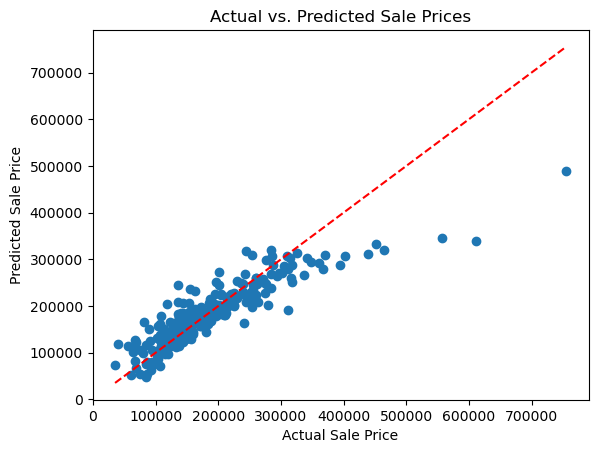

In [15]:
# Create scatter plot
plt.scatter(pred['Actual'], pred['Predicted'])

# Plot diagonal dashed red line for perfect predictions
plt.plot([pred['Actual'].min(), pred['Actual'].max()],
         [pred['Actual'].min(), pred['Actual'].max()], '--r')

# Add labels and title
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')

# Display the plot
plt.show()

In [16]:
# Evaluate the performance of your predictive model.
pred.head(10)

,Actual,Predicted,Delta
892,154500,149232.390625,5267.609375
1105,325000,313083.875000,11916.125000
413,115000,120604.273438,5604.273438
522,159000,181294.125000,22294.125000
1036,315500,260208.796875,55291.203125
614,75500,54865.828125,20634.171875
218,311500,191333.359375,120166.640625
1160,146000,159565.250000,13565.250000
649,84500,48352.796875,36147.203125
887,135500,163704.125000,28204.125000


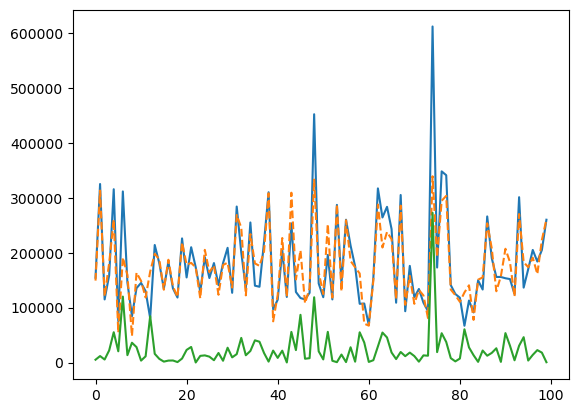

In [17]:
# Reset the index of the DataFrame and select the first 100 rows
pred1 = pred.reset_index().head(100)

# Plot the Actual values
plt.plot(pred1.index, pred1.Actual, label='Actual')

# Plot the Predicted values with a dashed line style
plt.plot(pred1.index, pred1.Predicted, label='Predicted', linestyle='--')

# Plot the Delta values (absolute difference between Actual and Predicted)
plt.plot(pred1.index, pred1.Delta, label='Delta')


## Save the Model

In [18]:
# # Export our model to HDF5 file
# file_path = "House_Price_Predictions.h5"

# # Save the model to an HDF5 file
# nn.save(file_path)

# # Print a success message
# print(f"Model successfully saved to {file_path}")
